# Milestone 1: Dengue Investigation
This research have been done by Elena María Ruiz and Raúl Bernalte for the subject Machine Learning Techniques at UCLM.

The purpose of this research is to determine and predict Dengue spread phenomenon. To reach this objective, we are going to have a data source from the web page of Driven Data.

---

This data has the following features:

* ``city`` – City abbreviations: sj for San Juan and iq for Iquitos
* ``week_start_date`` – Date given in yyyy-mm-dd format


* ``station_max_temp_c`` – Maximum temperature
* ``station_min_temp_c`` – Minimum temperature
* ``station_avg_temp_c`` – Average temperature
* ``station_precip_mm`` – Total precipitation
* ``station_diur_temp_rng_c`` – Diurnal temperature range


* ``precipitation_amt_mm`` – Total precipitation


* ``reanalysis_sat_precip_amt_mm`` – Total precipitation
* ``reanalysis_dew_point_temp_k`` – Mean dew point temperature
* ``reanalysis_air_temp_k`` – Mean air temperature
* ``reanalysis_relative_humidity_percent`` – Mean relative humidity
* ``reanalysis_specific_humidity_g_per_kg`` – Mean specific humidity
* ``reanalysis_precip_amt_kg_per_m2`` – Total precipitation
* ``reanalysis_max_air_temp_k`` – Maximum air temperature
* ``reanalysis_min_air_temp_k`` – Minimum air temperature
* ``reanalysis_avg_temp_k`` – Average air temperature
* ``reanalysis_tdtr_k`` – Diurnal temperature range


* ``ndvi_se`` – Pixel southeast of city centroid
* ``ndvi_sw`` – Pixel southwest of city centroid
* ``ndvi_ne`` – Pixel northeast of city centroid
* ``ndvi_nw`` – Pixel northwest of city centroid

## Initialization

First of all we are going to import all the Python libraries normally used in data science.

In [1]:
# data load and manipulation
from google.colab import files
import io
# dataframes library
import pandas as pd
# visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# basic operations
import numpy as np
import itertools

This function is used por obtain a dataframe from a csv file, in which we can determine the columns we want.

In [2]:
def upload_files (index_fields):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

In [3]:
train = upload_files([])
train.head()




Saving dengue_features_train.csv to dengue_features_train (3).csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In our case, we are going to train our model only with the weekly data from 2004 to 2010 at San Juan city.

In [4]:

filter_data=train[(train['year'] >= 2004) & (train['year'] <= 2010) & (train['city']=='sj')]
filter_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
711,sj,2004,1,2004-01-01,-0.26830,-0.123700,0.223757,0.176543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712,sj,2004,2,2004-01-08,-0.07310,0.017200,0.214729,0.222443,0.00,297.648571,297.571429,292.374286,299.3,296.1,20.7,72.577143,0.00,13.881429,2.028571,24.385714,5.557143,27.8,20.6,15.6
713,sj,2004,3,2004-01-15,NaN,0.002600,0.282100,0.289900,36.07,297.800000,297.971429,293.895714,299.5,296.5,20.2,78.942857,36.07,15.257143,2.171429,24.342857,5.957143,28.3,20.0,23.7
714,sj,2004,4,2004-01-22,-0.18635,-0.178625,-0.015533,0.010250,0.00,297.728571,298.107143,293.665714,300.2,295.7,1.1,78.264286,0.00,15.061429,3.042857,24.528571,6.100000,27.8,20.6,10.2
715,sj,2004,5,2004-01-29,-0.05350,-0.108000,0.236257,0.280414,0.00,297.560000,297.600000,292.878571,300.0,295.8,2.0,75.422857,0.00,14.390000,2.457143,24.628571,6.200000,28.9,20.0,1.8


## Preprocessing

We have to delete the columns ``city``, ``year``, ``weekofyear`` and ``week_start_date``. This data is not determinant information as rows are already ordered by time, so it is redundant and we don't need it for our model.

In [5]:
filter_data = filter_data.drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1)

In [6]:
print(filter_data.shape)
filter_data.head()

(225, 20)


,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
711,-0.26830,-0.123700,0.223757,0.176543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712,-0.07310,0.017200,0.214729,0.222443,0.00,297.648571,297.571429,292.374286,299.3,296.1,20.7,72.577143,0.00,13.881429,2.028571,24.385714,5.557143,27.8,20.6,15.6
713,NaN,0.002600,0.282100,0.289900,36.07,297.800000,297.971429,293.895714,299.5,296.5,20.2,78.942857,36.07,15.257143,2.171429,24.342857,5.957143,28.3,20.0,23.7
714,-0.18635,-0.178625,-0.015533,0.010250,0.00,297.728571,298.107143,293.665714,300.2,295.7,1.1,78.264286,0.00,15.061429,3.042857,24.528571,6.100000,27.8,20.6,10.2
715,-0.05350,-0.108000,0.236257,0.280414,0.00,297.560000,297.600000,292.878571,300.0,295.8,2.0,75.422857,0.00,14.390000,2.457143,24.628571,6.200000,28.9,20.0,1.8


In [8]:
filter_data.fillna(method='bfill', inplace=True)
pd.isnull(filter_data).any()
filter_data.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
711,-0.26830,-0.123700,0.223757,0.176543,0.00,297.648571,297.571429,292.374286,299.3,296.1,20.7,72.577143,0.00,13.881429,2.028571,24.385714,5.557143,27.8,20.6,15.6
712,-0.07310,0.017200,0.214729,0.222443,0.00,297.648571,297.571429,292.374286,299.3,296.1,20.7,72.577143,0.00,13.881429,2.028571,24.385714,5.557143,27.8,20.6,15.6
713,-0.18635,0.002600,0.282100,0.289900,36.07,297.800000,297.971429,293.895714,299.5,296.5,20.2,78.942857,36.07,15.257143,2.171429,24.342857,5.957143,28.3,20.0,23.7
714,-0.18635,-0.178625,-0.015533,0.010250,0.00,297.728571,298.107143,293.665714,300.2,295.7,1.1,78.264286,0.00,15.061429,3.042857,24.528571,6.100000,27.8,20.6,10.2
715,-0.05350,-0.108000,0.236257,0.280414,0.00,297.560000,297.600000,292.878571,300.0,295.8,2.0,75.422857,0.00,14.390000,2.457143,24.628571,6.200000,28.9,20.0,1.8


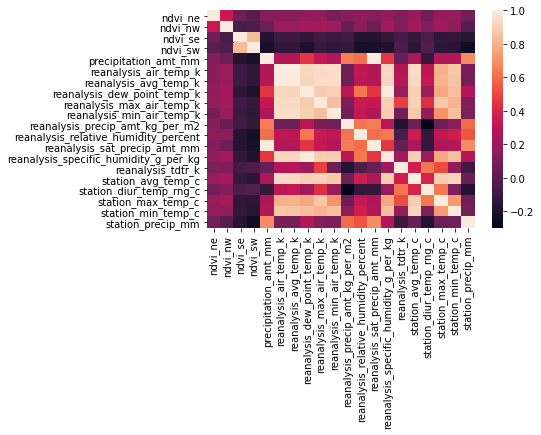

In [9]:
mtx_corr = filter_data.corr()
sns.heatmap(mtx_corr, xticklabels=mtx_corr.columns, yticklabels=mtx_corr.columns, annot=False)

*CATEGORIZAR VARIABLES* (Creo que no es necesario ya que no hay ninguna variable categórica)

There isn't any column with categorical values, so we don't have to perform a categoritazion of any variable.

*DISCRETIZACIÓN QUE SEA NECESARIA* (No se si será exactamente necesario para estas variables)

Also, we don't considerate neccesary to make a discretization with the values of our feautures. Instead of this, we are going to maintain the continuos values, as we think they take an important role being in its this continuos form.

*TRATAMIENTO DE VALORES PERDIDOS*

## Normalization